## Spheres Plot

#### SnC

In [169]:
import json

klist= [40, 45, 50, 55, 60]

md_list= [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]

steadiness_list = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
cohesiveness_list = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

for k in klist:
    with open("./spheres_result/spheres_2_" + str(k) + "_result.json") as emb_json:
        emb_data = json.load(emb_json)
        steadiness_data = emb_data["steadiness"]
        cohesiveness_data = emb_data["cohesivenss"]
        for i, md in enumerate(md_list):
            steadiness_list[i] += steadiness_data[str(md)]['3'] / len(klist)
            cohesiveness_list[i] += cohesiveness_data[str(md)]['3'] / len(klist)
                                                           
print(md_list)
print(steadiness_list)
print(cohesiveness_list)

[0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
[0.6234693067753123, 0.6308862877826941, 0.637879741004163, 0.6464547009798604, 0.6565916729616317, 0.6701520299825451, 0.681262582674677, 0.6981255774572016, 0.6993530924973987, 0.7051501162888115, 0.713252643409183]
[0.8237673710073148, 0.8147555790615328, 0.8266136044801092, 0.8321902793191738, 0.8455955370280086, 0.8660455913188361, 0.8862595987203425, 0.8858461575429123, 0.883631297349778, 0.8912631396002798, 0.8904823596874489]


#### TnC, MRRE

In [60]:
from helper import *
import sys

sys.path.append("/home/hj/vis2021_snc/metrics4mdp/metrics4mdp")
from provider import MDPMetricProvider

PATH_TO_DATASET = "../../dataset-generator/dataset/"

mlist = ["MRRE_XZ", "MRRE_ZX", "Continuity", "Trustworthiness"]

others_klist = [5, 7, 9, 11, 13]
others_result = {}

spheres_others_result = {}
for md in md_list:
    others_result[md] = {}
    for m in mlist:
        others_result[md][m] = 0
for k in others_klist:
    spheres_others_result[k] = {}
    for md in md_list:
        mnist_umap_path = make_path(PATH_TO_DATASET, "spheres", "umap", 2, [md, 3])
        emb_data, raw_data, label_data = get_data(mnist_umap_path)


        metricprovider = MDPMetricProvider(raw_data, emb_data, mlist, k=k)
        temp_result =  metricprovider.run()
        for m in mlist:
            others_result[md][m] += temp_result[m]
        spheres_others_result[k][md] = temp_result
            

MRRE_LH = [0] * len(md_list)
MRRE_HL = [0] * len(md_list)
Trustworthiness = [0] * len(md_list)
Continuity = [0] * len(md_list)
for i, md in enumerate(md_list):
    MRRE_LH[i] += others_result[md]["MRRE_XZ"] / len(others_klist)
    MRRE_HL[i] += others_result[md]["MRRE_ZX"] / len(others_klist)
    Trustworthiness[i] += others_result[md]["Trustworthiness"] / len(others_klist)
    Continuity[i] += others_result[md]["Continuity"] / len(others_klist)   

print(MRRE_HL)
print(MRRE_LH)
print(Trustworthiness)
print(Continuity)

[0.6791207191882578, 0.6805009299758732, 0.6709622643793507, 0.6684742417285079, 0.6637102570995099, 0.6615144067326543, 0.6570474314094402, 0.6529028023095387, 0.6492454315510489, 0.646946666617043, 0.6401450426056593]
[0.8395336967341008, 0.839946589565631, 0.8454028216820749, 0.8399667031454233, 0.8407692934743025, 0.8436519203179256, 0.8365484264143724, 0.8355512572351296, 0.8398853828091445, 0.8387460051232354, 0.8364386267701109]
[0.6638210715214939, 0.6645221904184516, 0.6615429853750419, 0.6602299419803502, 0.6588098389995078, 0.6569289048823109, 0.6547579443093576, 0.6524838497579266, 0.648964204593134, 0.646096996847621, 0.6414133539924397]
[0.8346673121413968, 0.8352604102320605, 0.8391451930699187, 0.835267326334666, 0.8354327662864176, 0.8385279735096028, 0.83181934584633, 0.8303868564981204, 0.8349038503197482, 0.8326988435192592, 0.8317452486881785]


In [61]:
# with open("./spheres_result/spheres_others_result.json", "w") as outfile:
#             json.dump(spheres_others_result, outfile)

In [171]:
MRRE_LH = [0] * len(md_list)
MRRE_HL = [0] * len(md_list)
Trustworthiness = [0] * len(md_list)
Continuity = [0] * len(md_list)
others_klist = [5, 7, 9, 11, 13]
md_list= [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
with open("./spheres_result/spheres_others_result.json") as result_json:
    result = json.load(result_json)
    for k in others_klist:
        k_result = result[str(k)]
        for i,md in enumerate(md_list):
            md = str(md)
            MRRE_LH[i] += k_result[md]["MRRE_XZ"] / len(others_klist)
            MRRE_HL[i] += k_result[md]["MRRE_ZX"] / len(others_klist)
            Trustworthiness[i] += k_result[md]["Trustworthiness"] / len(others_klist)
            Continuity[i] += k_result[md]["Continuity"] / len(others_klist)   

print(MRRE_HL)
print(MRRE_LH)
print(Trustworthiness)
print(Continuity)

[0.6779471676310906, 0.6794946955886509, 0.6704639733372969, 0.6681121207972237, 0.6633605102343794, 0.661337482859971, 0.6567689131076223, 0.6532300657669299, 0.6493709549030424, 0.64700535719016, 0.6402784779860897]
[0.8392169185646658, 0.8397194889321159, 0.8449612516707619, 0.839641810005139, 0.8404804439997803, 0.8433656515816708, 0.8363021586350671, 0.8352614085607244, 0.8395976230984522, 0.8382920669343426, 0.8361215940730518]
[0.6618934732388242, 0.6627835269787146, 0.6607180435445935, 0.6596950343932347, 0.6578914361596055, 0.6564567921249614, 0.6541735631493225, 0.6531150135562401, 0.6492326821230061, 0.6462296275789992, 0.6417076106455206]
[0.8340949612375659, 0.8348650697377176, 0.8384289222693273, 0.8347634302975369, 0.8349741304474197, 0.8379788252738152, 0.8313648373352398, 0.8299108987888624, 0.8344276731305714, 0.8319239370388309, 0.8311939624643092]


#### Plotting

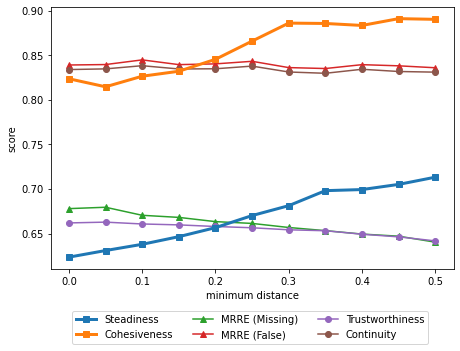

In [178]:
import matplotlib.pyplot as plt
import numpy as np

md_list = np.array(md_list)
s_list = np.array(steadiness_list)
c_list = np.array(cohesiveness_list)

mhl_list = np.array(MRRE_HL)
mlh_list = np.array(MRRE_LH)
t_list = np.array(Trustworthiness)
con_list = np.array(Continuity)

plt.figure(figsize=(6.5, 5))
stead = plt.plot(md_list, s_list, marker='s', linewidth=3, label='Steadiness', zorder=10)  
cohev = plt.plot(md_list, c_list, marker='s', linewidth=3, label='Cohesiveness', zorder=9)
mhl   = plt.plot(md_list, mhl_list, marker='^', label='MRRE (Missing)')
mlh   = plt.plot(md_list, mlh_list, marker='^', label='MRRE (False)')
truth = plt.plot(md_list, t_list, marker='o', label='Trustworthiness')
conti = plt.plot(md_list, con_list, marker='o', label='Continuity')
plt.xlabel("minimum distance")
plt.ylabel("score")
plt.legend(bbox_to_anchor=(0.95, -0.14), ncol=3)

plt.tight_layout()
plt.savefig('plots/spheres_result.svg')

## Mammoth Plot

#### SnC

In [179]:
import json
klist= [40, 45, 50, 55, 60, 65, 70]
klist = [40, 45, 50, 55, 60]
min_dist = [0.0]
n_neighbors = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
# n_neighbors = [3, 4, 5, 6, 7, 8, 9, 10]
steadiness_list = [0] * len(n_neighbors)
cohesiveness_list = [0] * len(n_neighbors)

for k in klist:
    with open("./mammoth_result/mammoth_2_" + str(k) + "_result.json") as emb_json:
        emb_data = json.load(emb_json)
        steadiness_data = emb_data["steadiness"]
        cohesiveness_data = emb_data["cohesivenss"]
        for i, nn in enumerate(n_neighbors):
            steadiness_list[i] += steadiness_data['0.0'][str(nn)] / len(klist)
            cohesiveness_list[i] += cohesiveness_data['0.0'][str(nn)] / len(klist)
                                                           
print(n_neighbors)
print(steadiness_list)
print(cohesiveness_list)

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[0.6983450089492145, 0.7063056179928358, 0.7254762097524433, 0.7809900267797496, 0.796812135923719, 0.804594683803101, 0.8064137399372195, 0.8178902740872358, 0.8038976288767801, 0.815294144238425, 0.8214861948203771, 0.8197563167130283, 0.8213494081289611, 0.8292209335044225, 0.8224397881426336, 0.8322033955196124, 0.8233423978957458, 0.8335238169001695]
[0.7157237431158119, 0.7324951467729766, 0.7805171847259755, 0.8094714032819772, 0.8192099205901424, 0.8190173046472937, 0.8308966669979041, 0.8484895374254733, 0.8303651141045592, 0.8415018467880196, 0.8510437138555307, 0.8525044803273105, 0.8506554187490145, 0.8541000114198991, 0.8558366423630581, 0.8540089567786739, 0.8547923656104133, 0.8614612284552676]


In [ ]:
from helper import *
import sys

sys.path.append("/home/hj/vis2021_snc/metrics4mdp/metrics4mdp")
from provider import MDPMetricProvider

PATH_TO_DATASET = "../../dataset-generator/dataset/"

mlist = ["MRRE_XZ", "MRRE_ZX", "Continuity", "Trustworthiness"]

others_klist = [5, 7, 9, 11, 13]
others_result = {}

mammoth_others_result = {}

print("START!!")
for nn in n_neighbors:
    others_result[nn] = {}
    for m in mlist:
            others_result[nn][m] = 0
for k in others_klist:
    mammoth_others_result[k] = {}
    for nn in n_neighbors:
        mnist_umap_path = make_path(PATH_TO_DATASET, "mammoth", "umap", 2, [0.0, nn])
        emb_data, raw_data, label_data = get_data(mnist_umap_path)

        metricprovider = MDPMetricProvider(raw_data, emb_data, mlist, k=k)
        temp_result =  metricprovider.run()
        for m in mlist:
            others_result[nn][m] += temp_result[m]
        mammoth_others_result[k][nn] = temp_result
    print(k, "finisehd")
            

            

In [25]:
# with open("./mammoth_result/mammoth_others_result.json", "w") as outfile:
#             json.dump(mammoth_others_result, outfile)

In [182]:
MRRE_LH = [0] * len(n_neighbors)
MRRE_HL = [0] * len(n_neighbors)
Trustworthiness = [0] * len(n_neighbors)
Continuity = [0] * len(n_neighbors)
klist = [5, 7, 9, 11, 13]
with open("./mammoth_result/mammoth_others_result.json") as result_json:
    result = json.load(result_json)
    for k in klist:
        k_result = result[str(k)]
        for i,nn in enumerate(n_neighbors):
            nn = str(nn)
            MRRE_LH[i] += k_result[nn]["MRRE_XZ"] / len(others_klist)
            MRRE_HL[i] += k_result[nn]["MRRE_ZX"] / len(others_klist)
            Trustworthiness[i] += k_result[nn]["Trustworthiness"] / len(others_klist)
            Continuity[i] += k_result[nn]["Continuity"] / len(others_klist)   


    

print(MRRE_HL)
print(MRRE_LH)
print(Trustworthiness)
print(Continuity)

[0.9699316218316241, 0.9922769081045677, 0.9970908767768799, 0.9983730653972541, 0.9991895821793497, 0.9990997687580208, 0.9989959808816096, 0.9991448449522724, 0.9991065695255289, 0.9990310630991954, 0.9990768626674182, 0.9989465407798983, 0.9989543683802554, 0.9989162337280044, 0.9988087806376413, 0.9988853012819155, 0.9988983333761835, 0.9987910651445294]
[0.9148435237229975, 0.9501751770503815, 0.9723258394096205, 0.9933896413884891, 0.9965343728653046, 0.9967271361599838, 0.9961731071445574, 0.9974884883250604, 0.9977685396678742, 0.9978862843770799, 0.9979025443199271, 0.997838420016169, 0.997780934299523, 0.9977592107589515, 0.9975627855043814, 0.9978619177958792, 0.9978218627827347, 0.9977976677033649]
[0.9403587959940546, 0.9835673993292773, 0.9939443611498721, 0.9973295495205132, 0.9991739423833087, 0.9990279860924521, 0.9988695405438999, 0.9992570017607086, 0.9992386892512004, 0.9991717250987877, 0.9992462839626102, 0.9991025651201005, 0.9991020073187253, 0.9990851931588473,

#### Plotting

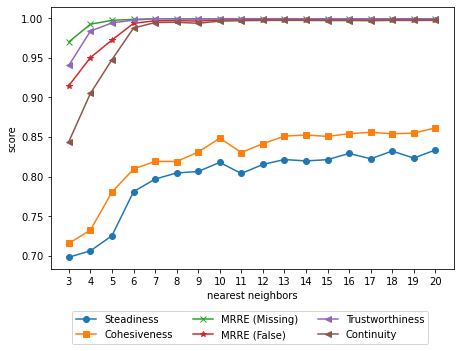

In [183]:
import matplotlib.pyplot as plt
import numpy as np

nn_list = np.array(n_neighbors)
s_list = np.array(steadiness_list)
c_list = np.array(cohesiveness_list)

mhl_list = np.array(MRRE_HL)
mlh_list = np.array(MRRE_LH)
t_list = np.array(Trustworthiness)
con_list = np.array(Continuity)

plt.figure(figsize=(6.5, 5))
stead = plt.plot(nn_list, s_list, marker='o', linewidth=3, label='Steadiness', zorder=10)  
cohev = plt.plot(nn_list, c_list, marker='s', linewidth=3, label='Cohesiveness', zorder=10)
mhl   = plt.plot(nn_list, mhl_list, marker='x', label='MRRE (Missing)')
mlh   = plt.plot(nn_list, mlh_list, marker='*', label='MRRE (False)')
truth = plt.plot(nn_list, t_list, marker='<', label='Trustworthiness')
conti = plt.plot(nn_list, con_list, marker='<', label='Continuity')
plt.xlabel("nearest neighbors")
plt.ylabel("score")
plt.legend(bbox_to_anchor=(0.95, -0.14), ncol=3)

plt.xticks([3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,14, 15, 16, 17, 18, 19, 20])

plt.tight_layout()
plt.savefig('plots/mammoth_result.svg')

## PCA Plot

#### TnC, MRRE Data generation

In [4]:
from helper import *
import sys
import numpy as np

sys.path.append("/home/hj/vis2021_snc/metrics4mdp/metrics4mdp")
from provider import MDPMetricProvider

PATH_TO_DATASET = "../../dataset-generator/dataset/"

mlist = ["MRRE_XZ", "MRRE_ZX", "Continuity", "Trustworthiness"]

n_components =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

datasets = ["fmnist", "kmnist", "cifar10"]
datasets = ["mnist"]

for dataset in datasets:
    print("STARTED", dataset)
    others_klist = [10, 20]
    others_result = {}

    data_others_result = {}
    
    data_pca_path = make_path(PATH_TO_DATASET, dataset, "pca", 1, [60])
    emb_data, raw_data, label_data = get_data(data_pca_path)

    print("START!!")
    for nn in n_components:
        others_result[nn] = {}
        for m in mlist:
            others_result[nn][m] = 0
    for k in others_klist:
        data_others_result[k] = {}
        for nn in n_components:
            
            emb_data = np.array(emb_data)
            current_emb_data = emb_data[:, nn:(nn+2)]
            current_emb_data = current_emb_data
            raw_data = raw_data
            metricprovider = MDPMetricProvider(raw_data, current_emb_data, mlist, k=k)
            temp_result =  metricprovider.run()
            for m in mlist:
                others_result[nn][m] += temp_result[m]
            data_others_result[k][nn] = temp_result
        print(k, "finished")
    
    with open("./pca_result/" + dataset + "_others_1_result.json", "w") as outfile:
        json.dump(data_others_result, outfile)

STARTED mnist
START!!
10 finished
20 finished


In [6]:
import json
import matplotlib


klist = [10, 20]

n_components =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
# n_components = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

dataset = "cifar10"

with open("./pca_result/" + dataset + "_others_1_result.json") as result_json:
    result = json.load(result_json)
    MRRE_LH = [0] * len(n_components)
    MRRE_HL = [0] * len(n_components)
    Trustworthiness = [0] * len(n_components)
    Continuity = [0] * len(n_components)
    for k in klist:
        k_result = result[str(k)]
        for i,nn in enumerate(n_components):
            nn = str(nn)
            MRRE_LH[i] += k_result[nn]["MRRE_XZ"] / len(klist)
            MRRE_HL[i] += k_result[nn]["MRRE_ZX"] / len(klist)
            Trustworthiness[i] += k_result[nn]["Trustworthiness"] / len(klist)
            Continuity[i] += k_result[nn]["Continuity"] / len(klist)   
    print(MRRE_HL)
    print(MRRE_LH)
    print(Trustworthiness)
    print(Continuity)

steadiness_list = [0] * len(n_components)
cohesiveness_list = [0] * len(n_components)


klist = [40, 45, 50, 55, 60]
klist = [40]
for k in klist:
    with open("./pca_result/" + dataset + "_1_" + str(k) + "_result.json") as emb_json:
        emb_data = json.load(emb_json)
        steadiness_data = emb_data["steadiness"]
        cohesiveness_data = emb_data["cohesivenss"]
        for i, nc in enumerate(n_components):
            steadiness_list[i] += steadiness_data[str(nc)] / len(klist)
            cohesiveness_list[i] += cohesiveness_data[str(nc)] / len(klist)
                                                           
print(n_components)
print(steadiness_list)
print(cohesiveness_list)
    
import matplotlib.pyplot as plt
import numpy as np

nn_list = np.array(n_components)
s_list = np.array(steadiness_list)
c_list = np.array(cohesiveness_list)

mhl_list = np.array(MRRE_HL)
mlh_list = np.array(MRRE_LH)
t_list = np.array(Trustworthiness)
con_list = np.array(Continuity)

plt.figure(figsize=(6.5, 5))
stead = plt.plot(nn_list, s_list, marker='o', linewidth=3, label='Steadiness', zorder=10)  
cohev = plt.plot(nn_list, c_list, marker='s', linewidth=3, label='Cohesiveness', zorder=10)
mhl   = plt.plot(nn_list, mhl_list, marker='x', label='MRRE (Missing)')
mlh   = plt.plot(nn_list, mlh_list, marker='*', label='MRRE (False)')
truth = plt.plot(nn_list, t_list, marker='<', label='Trustworthiness')
conti = plt.plot(nn_list, con_list, marker='<', label='Continuity')
plt.xlabel("principle axis #")
plt.ylabel("score")
plt.legend(bbox_to_anchor=(0.95, -0.14), ncol=3)

# plt.xticks([3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,14, 15, 16, 17, 18, 19, 20])

plt.tight_layout()
plt.savefig("plots/pca_"+ dataset + "_result.svg")

KeyError: '10'